# Первые соревнования по регрессии

### Импортирую библиотеки и заготовки

In [23]:
%run ./PLs.ipynb

### Приступаем к анализу данных

In [7]:
listdir("../data_sorev")

['data_description.txt', 'test.csv', 'sample_submission.csv', 'train.csv']

In [297]:
train = pd.read_csv('../data_sorev/train.csv')
test = pd.read_csv('../data_sorev/test.csv')

In [298]:
getInfo(train), getInfo(test)

There is 43 Categorical features (put i=5 to see names); And there is 38 Numerical features (put i=6 to see names); Shape is: (1460, 81)
There is 43 Categorical features (put i=5 to see names); And there is 37 Numerical features (put i=6 to see names); Shape is: (1459, 80)


((1460, 81), (1459, 80))

In [299]:
getInfo(train, i=1)

.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [300]:
getInfo(train, i=2)

.describe(include=all)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [301]:
getInfo(train, i=3)

.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      14

In [302]:
getInfo(train, i=4)

81  features:


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Добавим описание признаков

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling

* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality

* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning

* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade

* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location

* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature

* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Едем дальше


 mu = 180921.20 and sigma = 79415.29



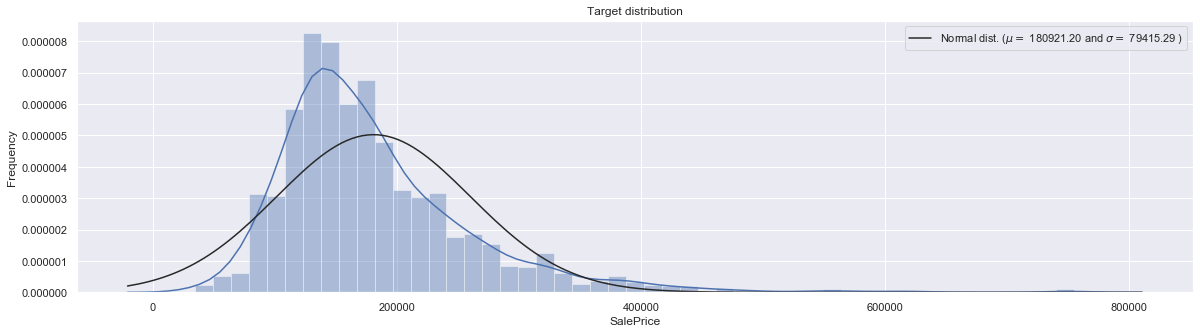

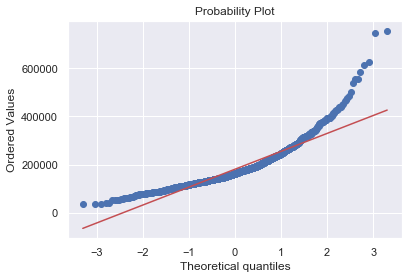

In [303]:
getInfo(train, target='SalePrice', i=9)

In [304]:
getInfo(train, i=5)

38 Numerical features:


array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [305]:
getInfo(train, i=7)

43  Ctegorical features:


array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


'df_numerical.hist()'

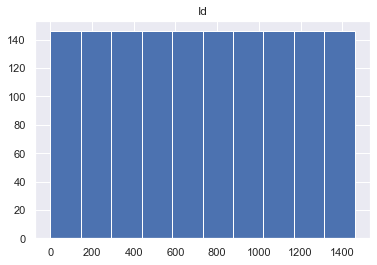

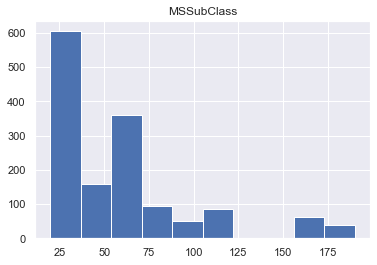

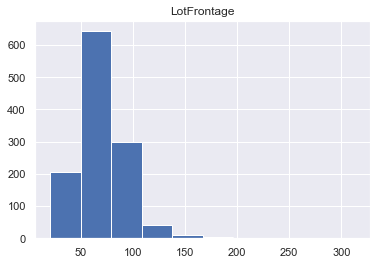

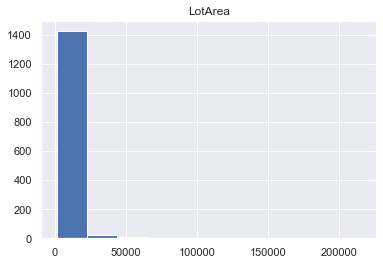

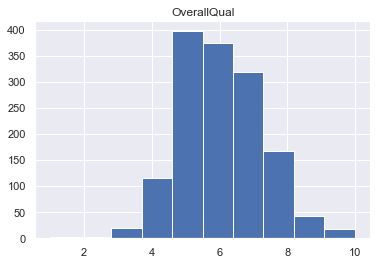

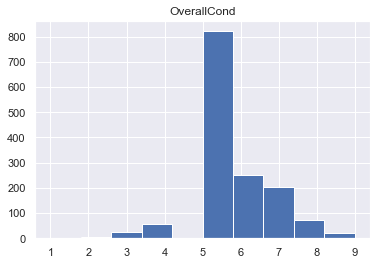

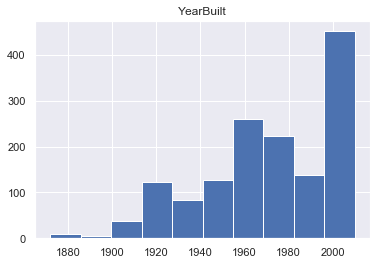

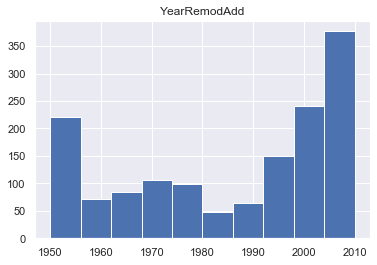

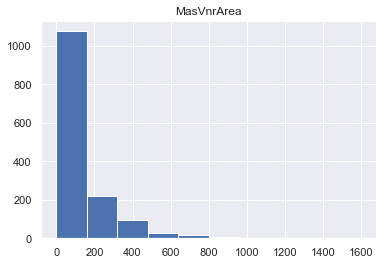

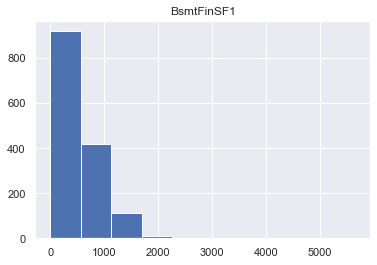

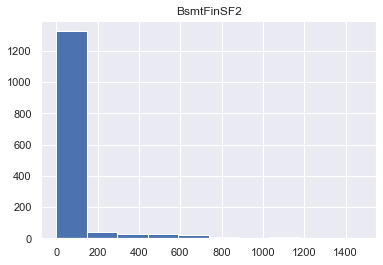

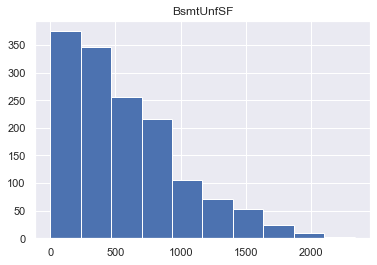

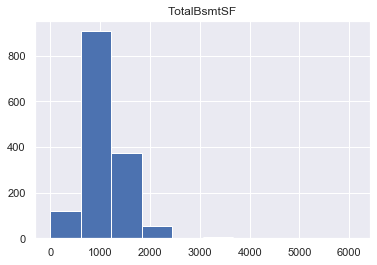

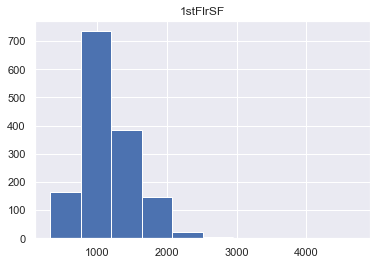

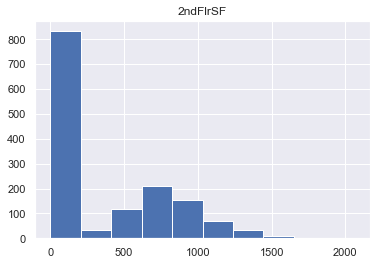

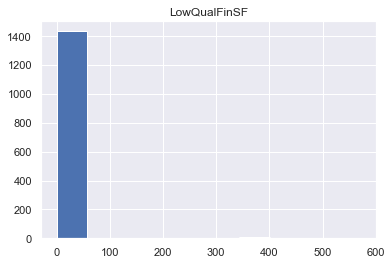

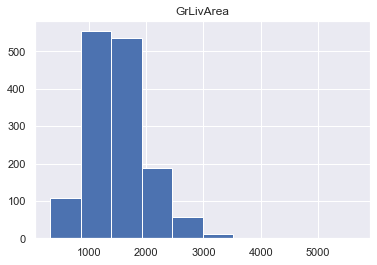

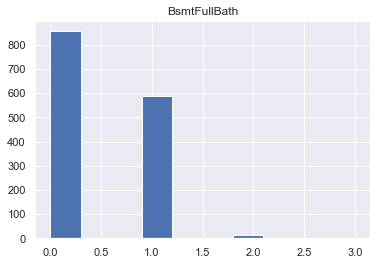

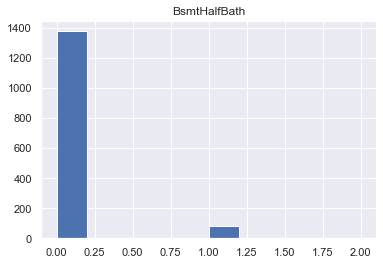

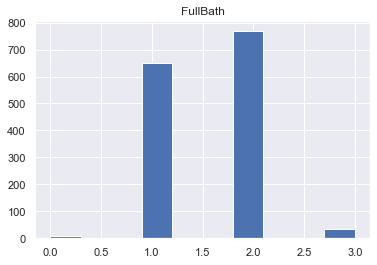

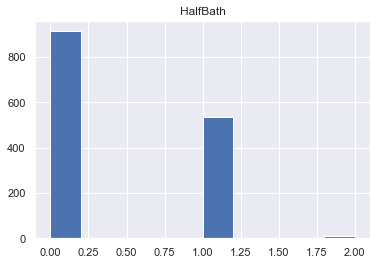

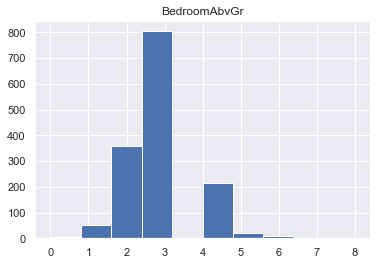

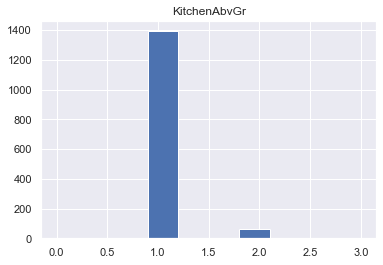

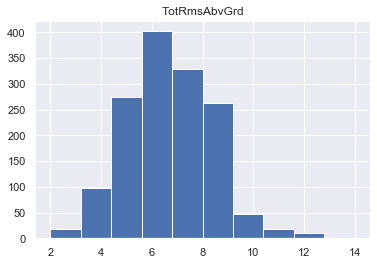

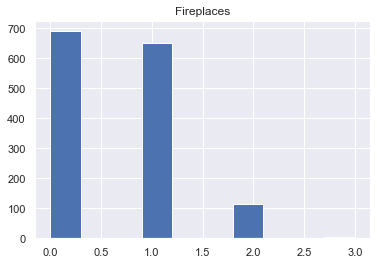

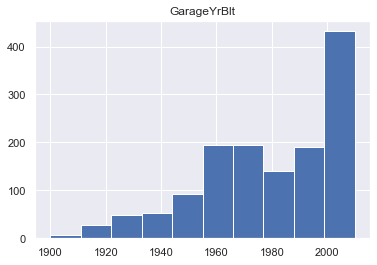

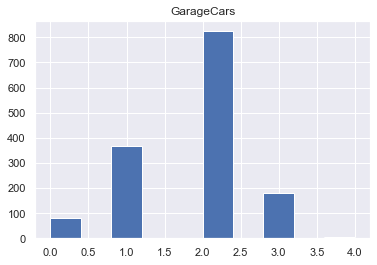

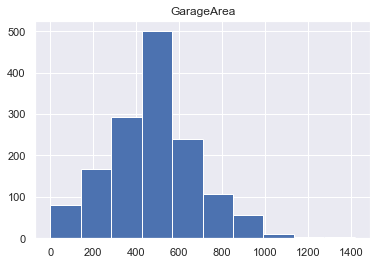

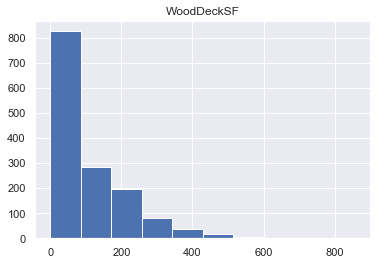

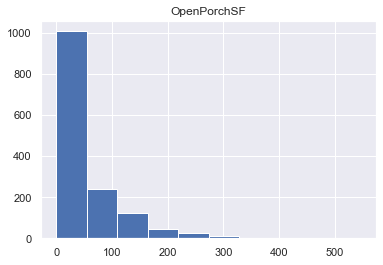

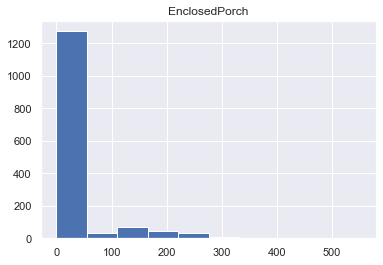

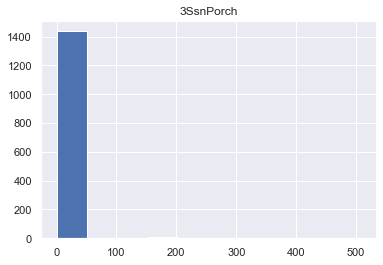

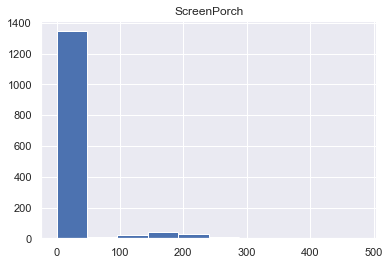

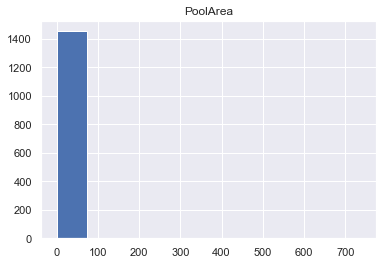

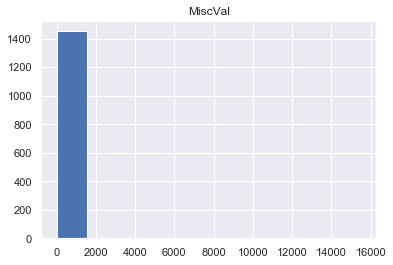

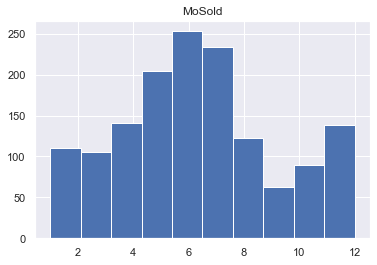

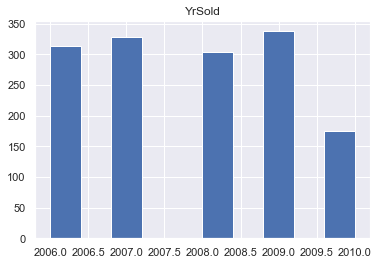

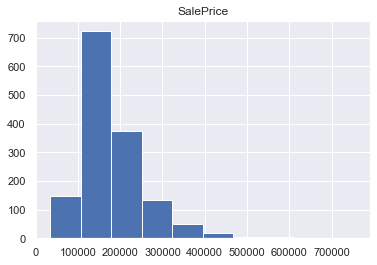

In [306]:
getInfo(train, i=6)

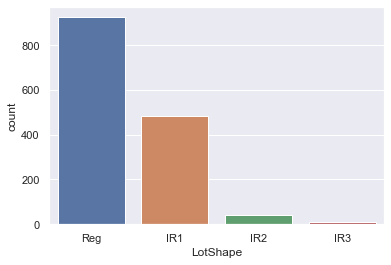

In [307]:
getInfo(train, a='LotShape', i=8)

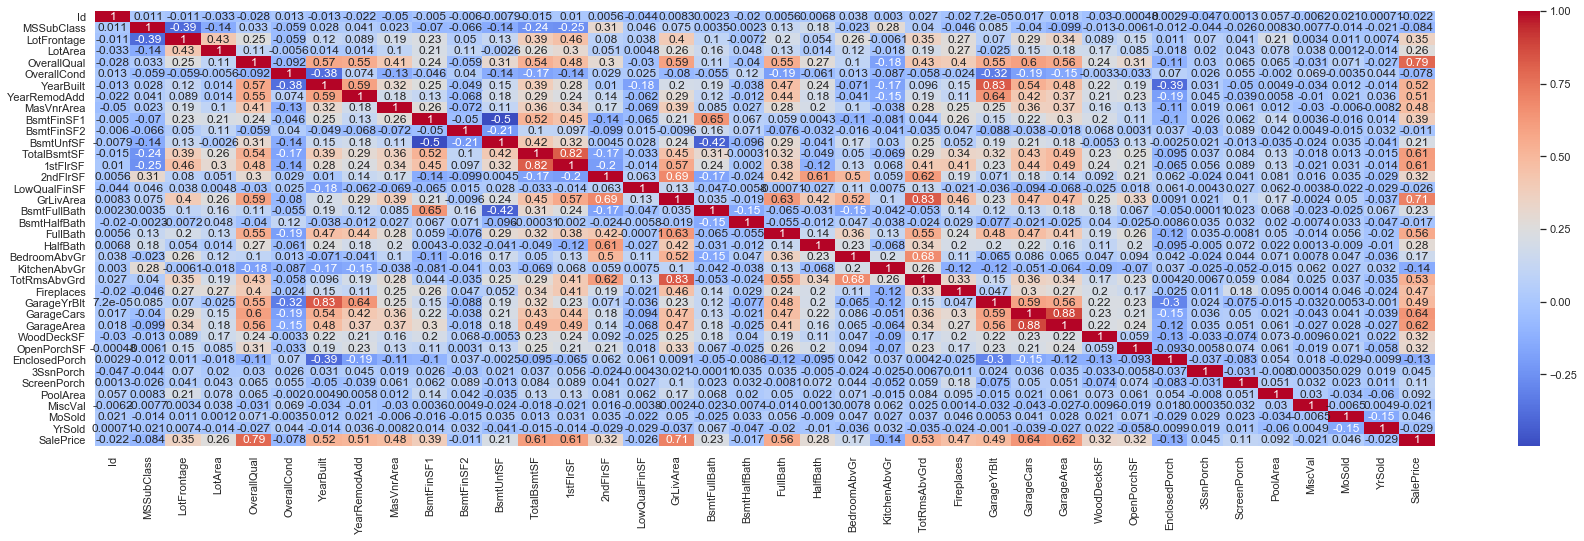

In [308]:
getInfo(train, a='LotShape', i=10)


 mu = 6.10 and sigma = 1.38



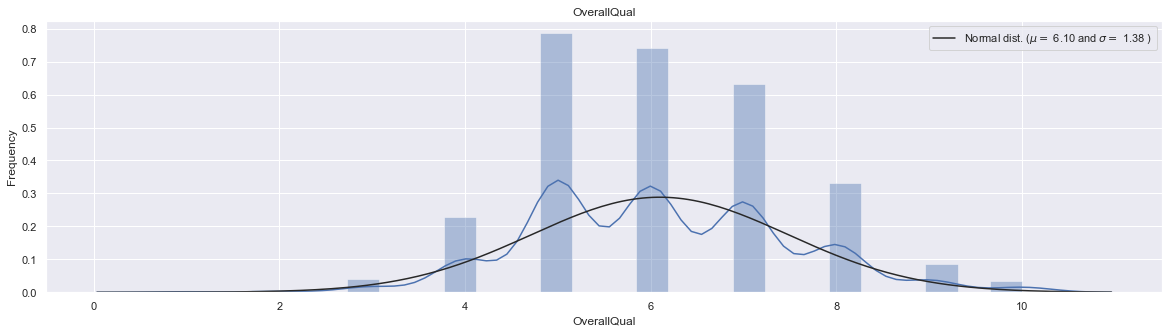

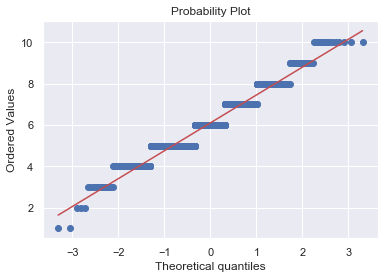

In [309]:
getInfo(train, a='OverallQual', i=11)


 mu = 5.58 and sigma = 1.11



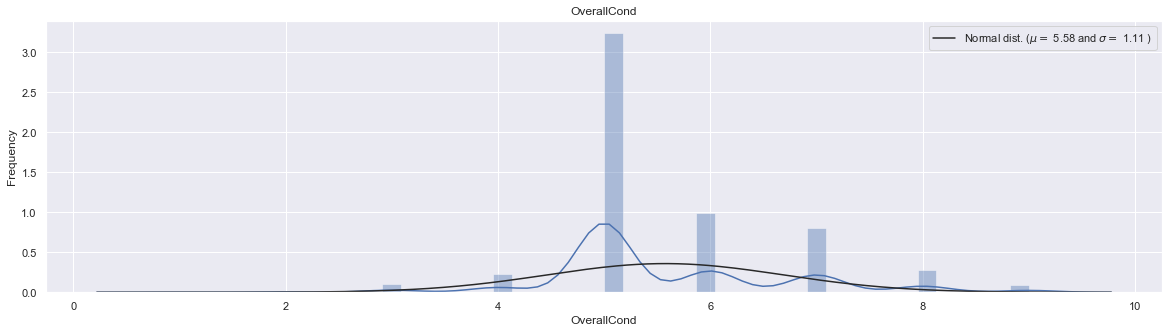

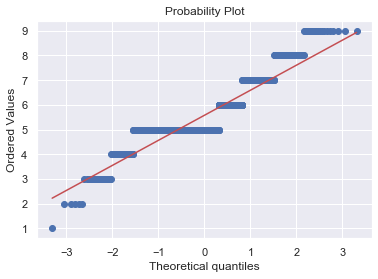

In [310]:
getInfo(train, a='OverallCond', i=11)

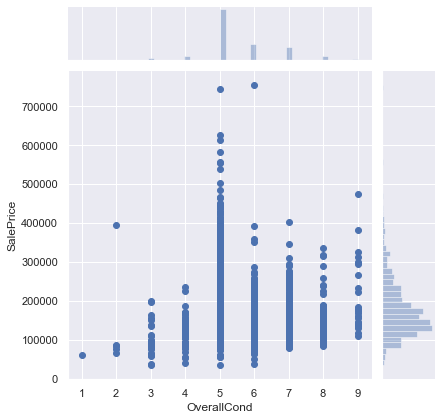

In [311]:
getInfo(train, a='SalePrice', b='OverallCond', i=12)

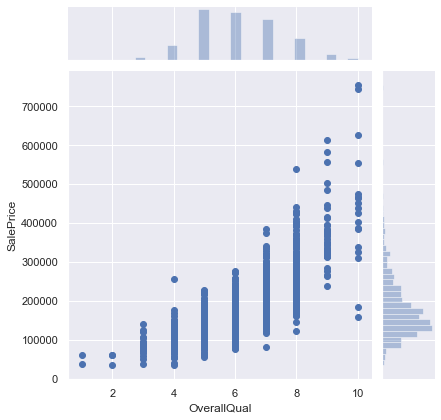

In [312]:
getInfo(train, a='SalePrice', b='OverallQual', i=12)

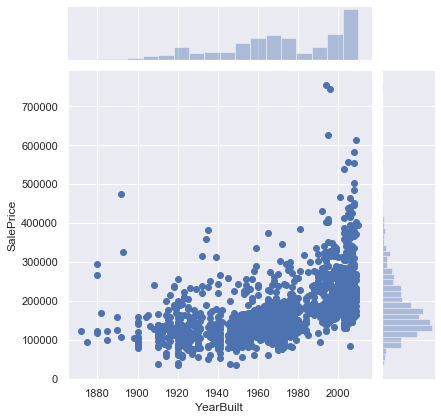

In [313]:
getInfo(train, a='SalePrice', b='YearBuilt', i=12)

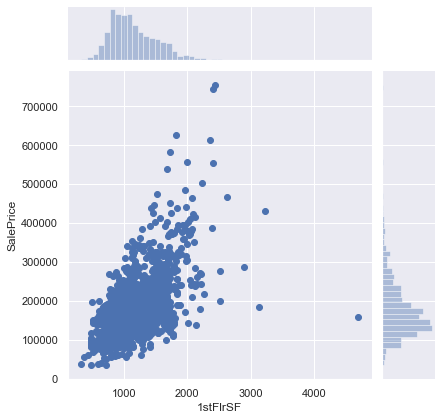

In [314]:
getInfo(train, a='SalePrice', b='1stFlrSF', i=12)

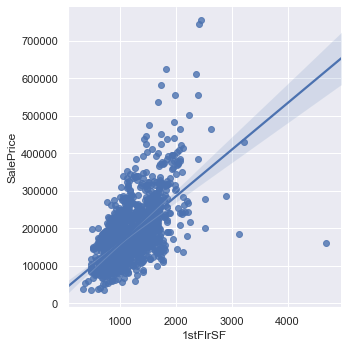

In [661]:
getInfo(train, a='SalePrice', b='1stFlrSF', i=13)


ValueError: Expected 2D array, got 1D array instead:
array=[ 856. 1262.  920. ... 1188. 1078. 1256.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

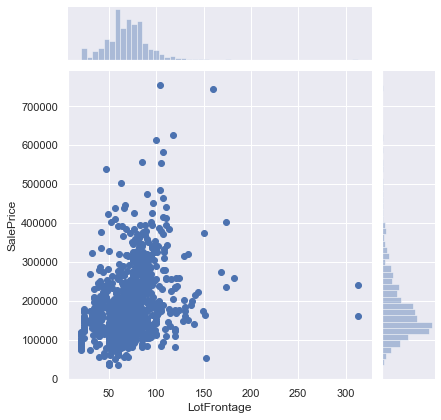

In [316]:
getInfo(train, a='SalePrice', b='LotFrontage', i=12)

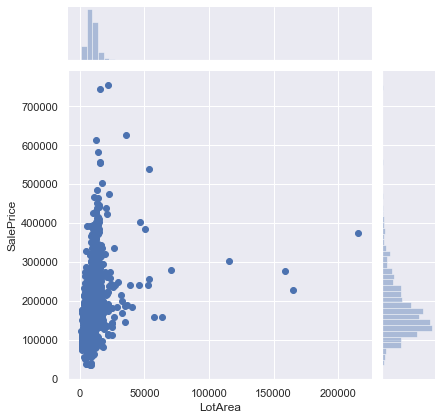

In [317]:
getInfo(train, a='SalePrice', b='LotArea', i=12)

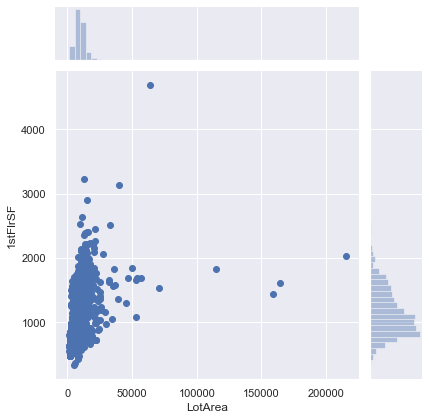

In [318]:
getInfo(train, a='1stFlrSF', b='LotArea', i=12)

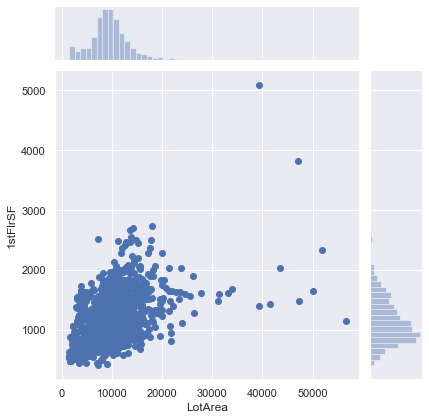

In [319]:
getInfo(test, a='1stFlrSF', b='LotArea', i=12)

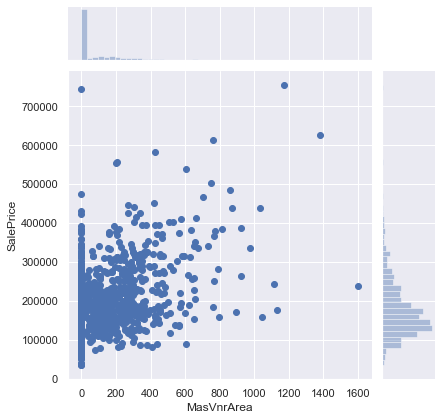

In [320]:
getInfo(train, a='SalePrice', b='MasVnrArea', i=12)

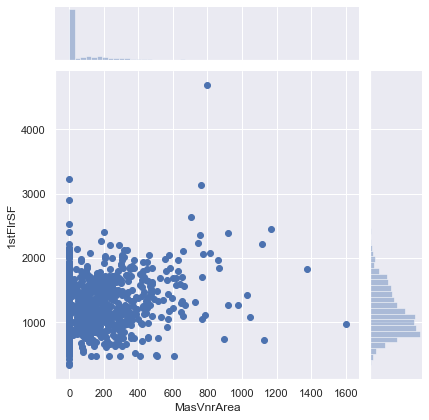

In [321]:
getInfo(train, a='1stFlrSF', b='MasVnrArea', i=12)

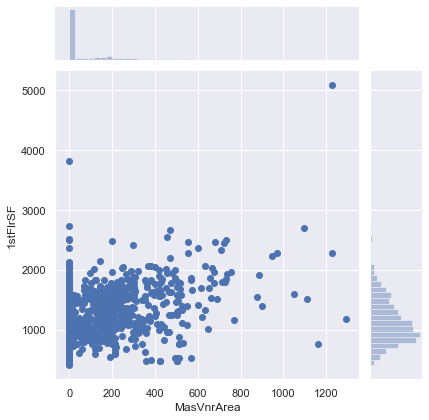

In [322]:
getInfo(test, a='1stFlrSF', b='MasVnrArea', i=12)

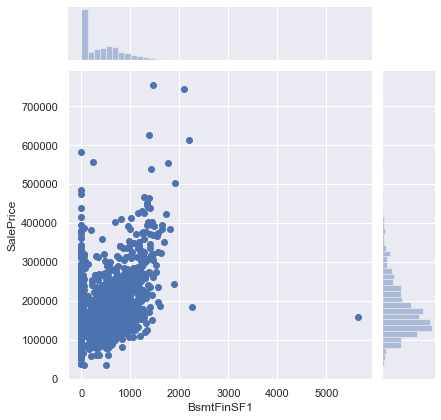

In [323]:
getInfo(train, a='SalePrice', b='BsmtFinSF1', i=12)

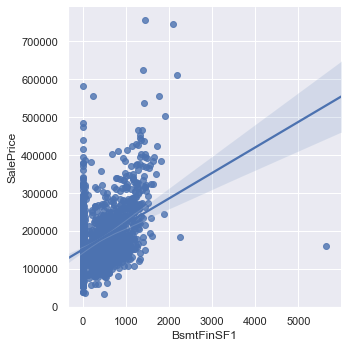

In [324]:
getInfo(train, a='SalePrice', b='BsmtFinSF1', i=13)

In [325]:
getInfo(train, i=7)

43  Ctegorical features:


array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

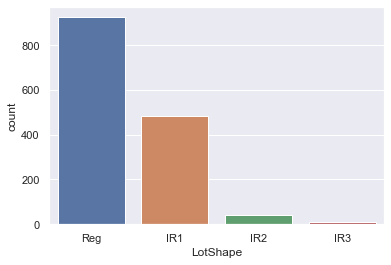

In [326]:
getInfo(train, a='LotShape', i=8)

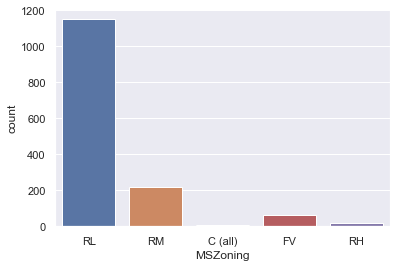

In [327]:
getInfo(train, a='MSZoning', i=8)

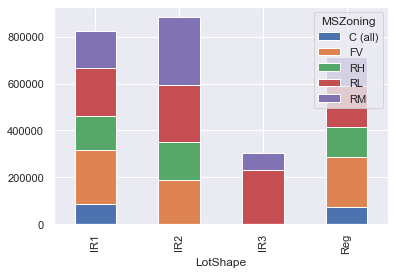

In [328]:
getInfo(train, a='SalePrice', b='LotShape', c='MSZoning', i=14)

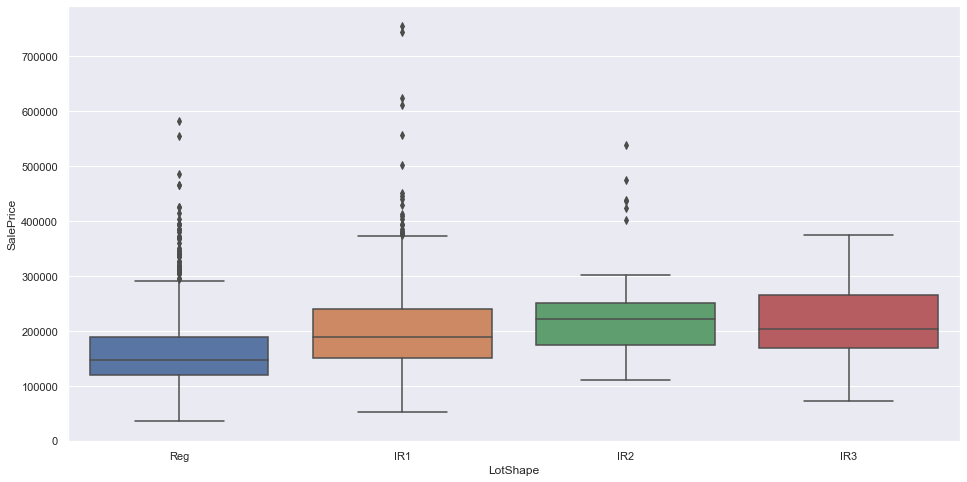

In [329]:
getInfo(train, a='SalePrice', b='LotShape', i=15)

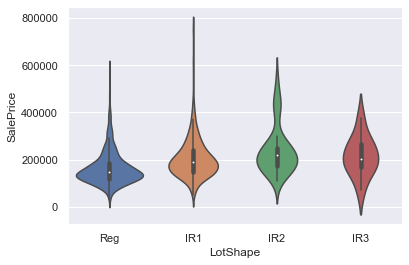

In [330]:
getInfo(train, a='SalePrice', b='LotShape', i=16)

In [331]:
getInfo(train, a='SalePrice', b='LotShape', i=17)

In [332]:
getInfo(train)

There is 43 Categorical features (put i=5 to see names); And there is 38 Numerical features (put i=6 to see names); Shape is: (1460, 81)


(1460, 81)

### Далее тестим первые результаты

In [515]:
combined = train.drop("SalePrice", axis=1).append(test)
nan_percentage = combined.isnull().sum().sort_values(ascending=False) / combined.shape[0]
missing_val = nan_percentage[nan_percentage > 0]

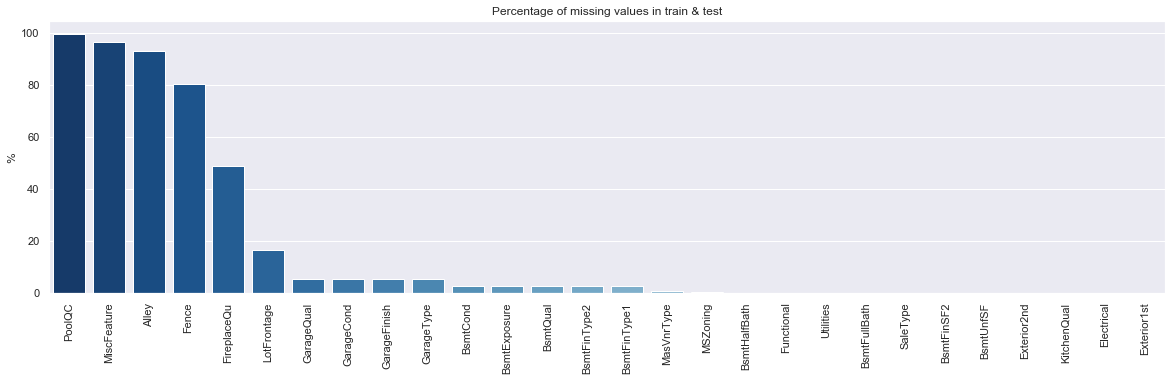

In [516]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing_val.index.values, y=missing_val.values * 100, palette="Blues_r");
plt.title("Percentage of missing values in train & test");
plt.ylabel("%");
plt.xticks(rotation=90);

In [517]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [518]:
to_drop = missing_val[missing_val > 0.1].index.values
combined = combined.drop(to_drop, axis=1)
combined.shape

(2919, 74)

In [520]:
to_drop

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'], dtype=object)

In [521]:
train_1 = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [522]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageQual        81
GarageCond        81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
RoofStyle          0
RoofMatl           0
Exterior1st        0
dtype: int64

In [523]:
train_1.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
Electrical       1
Exterior2nd      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrArea       0
YearBuilt        0
ExterQual        0
ExterCond        0
Foundation       0
dtype: int64

In [524]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageQual,78,0.053461
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageType,76,0.052090


In [525]:
test_1 = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [526]:
test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MSZoning           4
Utilities          2
Functional         2
BsmtHalfBath       2
dtype: int64

In [527]:
test_1.isnull().sum().sort_values(ascending=False).head(20)

GarageCond      78
GarageFinish    78
GarageQual      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
MasVnrType      16
MSZoning         4
Utilities        2
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
BsmtFinSF2       1
BsmtUnfSF        1
SaleType         1
Exterior2nd      1
Exterior1st      1
dtype: int64

In [528]:
cat_candidates = combined.dtypes[combined.dtypes=="object"].index.values
cat_candidates

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

In [529]:
#Another method - to list
categorical_feature_mask = train.dtypes==object
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [531]:
type(categorical_cols), type(cat_candidates)

(list, numpy.ndarray)

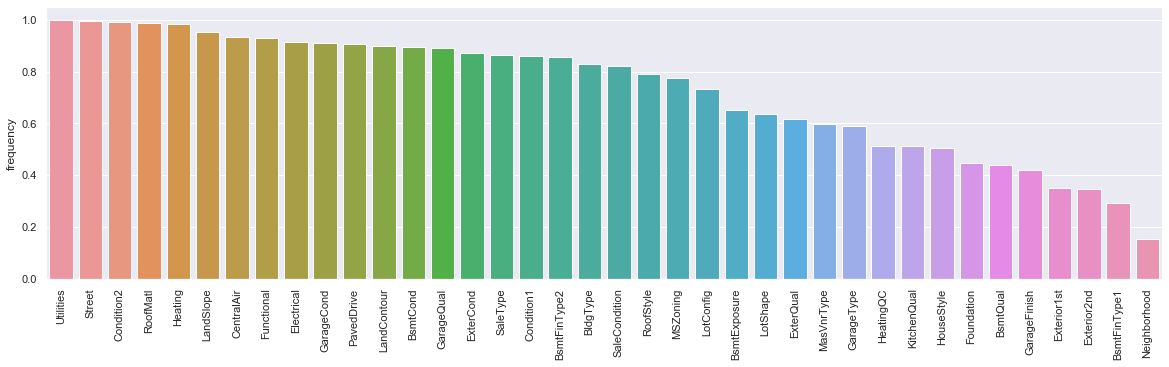

In [532]:
frequencies = []
for col in cat_candidates:
    overall_freq = combined.loc[:, col].value_counts().max() / combined.shape[0]
    frequencies.append([col, overall_freq])

frequencies = np.array(frequencies)
freq_df = pd.DataFrame(index=frequencies[:,0], data=frequencies[:,1], columns=["frequency"])
sorted_freq = freq_df.frequency.sort_values(ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x=sorted_freq.index[0:43], y=sorted_freq[0:43].astype(np.float))
plt.xticks(rotation=90);

In [533]:
example = "Utilities"
combined.loc[:,example].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [534]:
freq_df.frequency = freq_df.frequency.astype(np.float)
cats_to_drop = freq_df[freq_df.frequency >= 0.9].index.values
len(cats_to_drop)

11

In [536]:
cats_to_drop

array(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond',
       'PavedDrive'], dtype=object)

In [538]:
to_drop

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'], dtype=object)

In [539]:
combined.shape

(2919, 74)

In [540]:
combined_1 = combined.drop(cats_to_drop, axis=1)
combined_1.shape

(2919, 63)

In [542]:
cat_candidates = combined.dtypes[combined.dtypes=="object"].index.values
cat_candidates

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

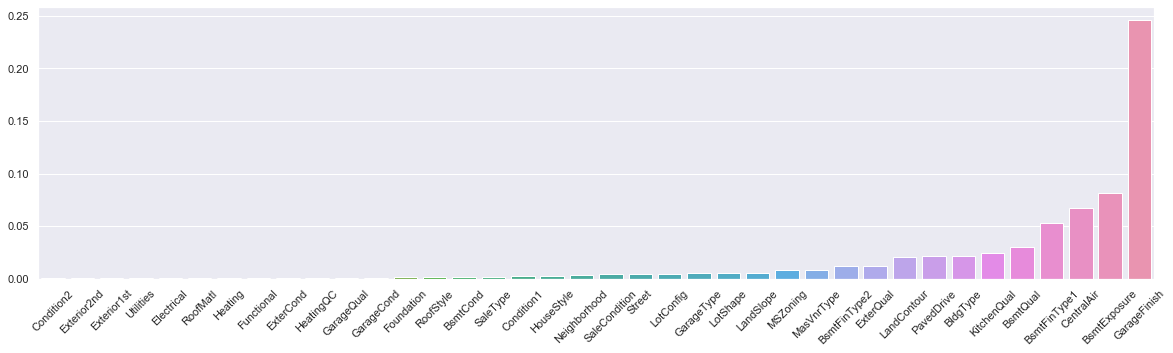

In [543]:
min_frequency = pd.Series(index=cat_candidates)
for col in cat_candidates:
    min_frequency.loc[col] = combined.loc[:,col].value_counts().min() / combined.shape[0]
min_frequency = min_frequency.sort_values()

plt.figure(figsize=(20,5))
sns.barplot(x=min_frequency.index, y=min_frequency.values)
plt.xticks(rotation=45);

In [544]:
num_candidates = combined.dtypes[combined.dtypes!="object"].index.values
num_candidates

array(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold'], dtype=object)

In [545]:
combined.loc[:, num_candidates].head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
5,6,50,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,796.0,796,566,0,1362,1.0,0.0,1,1,1,1,5,0,1993.0,2.0,480.0,40,30,0,320,0,0,700,10,2009
6,7,20,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,1686.0,1694,0,0,1694,1.0,0.0,2,0,3,1,7,1,2004.0,2.0,636.0,255,57,0,0,0,0,0,8,2007
7,8,60,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,1107.0,1107,983,0,2090,1.0,0.0,2,1,3,1,7,2,1973.0,2.0,484.0,235,204,228,0,0,0,350,11,2009
8,9,50,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,952.0,1022,752,0,1774,0.0,0.0,2,0,2,2,8,2,1931.0,2.0,468.0,90,0,205,0,0,0,0,4,2008
9,10,190,7420,5,6,1939,1950,0.0,851.0,0.0,140.0,991.0,1077,0,0,1077,1.0,0.0,1,0,2,2,5,2,1939.0,1.0,205.0,0,4,0,0,0,0,0,1,2008


In [546]:
next_cat_candidates = [
    "OverallQual", "OverallCond", "MSSubClass", 'BsmtFullBath',
    'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'
]
len(next_cat_candidates)

12

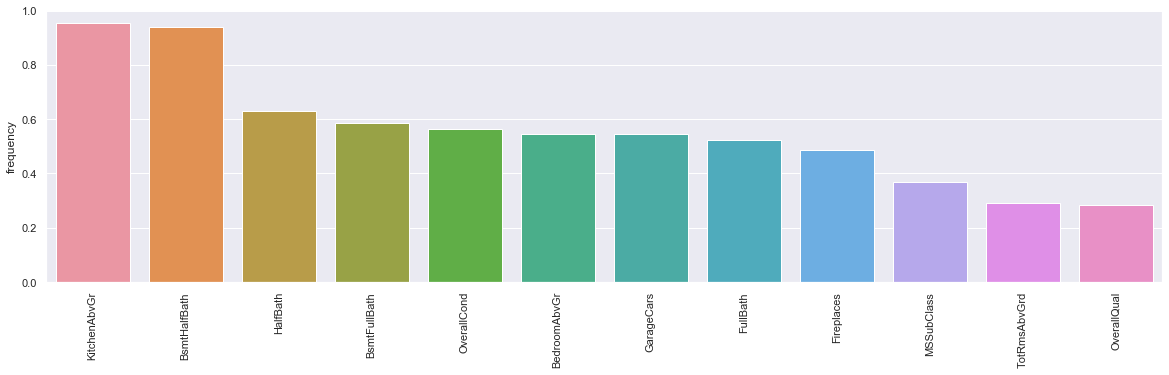

In [547]:
frequencies = []
for col in next_cat_candidates:
    overall_freq = combined.loc[:, col].value_counts().max() / combined.shape[0]
    frequencies.append([col, overall_freq])

frequencies = np.array(frequencies)
freq_df = pd.DataFrame(index=frequencies[:,0], data=frequencies[:,1], columns=["frequency"])
sorted_freq = freq_df.frequency.sort_values(ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x=sorted_freq.index[0:30], y=sorted_freq[0:30].astype(np.float))
plt.xticks(rotation=90);

In [548]:
cats_to_drop = ["KitchenAbvGr", "BsmtHalfBath"]
combined_2 = combined.drop(cats_to_drop, axis=1)
combined_3 = combined_1.drop(cats_to_drop, axis=1)

In [549]:
combined.shape , combined_1.shape , combined_2.shape, combined_3.shape

((2919, 74), (2919, 63), (2919, 72), (2919, 61))

In [550]:
next_cat_candidates_1 = next_cat_candidates

In [551]:
next_cat_candidates_1, cats_to_drop

(['OverallQual',
  'OverallCond',
  'MSSubClass',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars'],
 ['KitchenAbvGr', 'BsmtHalfBath'])

In [552]:
next_cat_candidates_1.append('KitchenAbvGr')

In [553]:
next_cat_candidates_1

['OverallQual',
 'OverallCond',
 'MSSubClass',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'KitchenAbvGr']

In [554]:
for col in cats_to_drop:
    next_cat_candidates_1.remove(col)

In [555]:
len(next_cat_candidates), len(next_cat_candidates_1)

(11, 11)

In [556]:
len(cat_candidates), len(next_cat_candidates)

(38, 11)

In [557]:
for col in next_cat_candidates:
    combined[col] = combined[col].astype("object")

In [558]:
for col in next_cat_candidates:
    combined_1[col] = combined[col].astype("object")

In [559]:
for col in cat_candidates:
    combined_2[col] = combined[col].astype("object")

In [560]:
for col in next_cat_candidates:
    combined_3[col] = combined[col].astype("object")

In [561]:
combined.shape ,combined_1.shape, combined_2.shape, combined_3.shape

((2919, 74), (2919, 63), (2919, 72), (2919, 62))

In [565]:
num_candidates = combined.dtypes[combined.dtypes!="object"].index.values
num_candidates_1 = combined_1.dtypes[combined_1.dtypes!="object"].index.values
num_candidates_2 = combined_2.dtypes[combined_2.dtypes!="object"].index.values
num_candidates_3 = combined_3.dtypes[combined_3.dtypes!="object"].index.values
len(num_candidates), len(num_candidates_1), len(num_candidates_2), len(num_candidates_3)

(25, 25, 34, 24)

In [580]:
cat_candidates, len(cat_candidates)

(array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object), 38)

In [569]:
num_candidates

array(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [570]:
len(num_candidates), len(cat_candidates)

(25, 38)

In [581]:
losse_num = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
losse_num

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [582]:
cat_candidates_new = combined.dtypes[combined.dtypes=="object"].index.values
cat_candidates_new , len(cat_candidates_new)

(array(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
        'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
        'SaleCondition'], dtype=object), 49)

In [579]:
combined[losse_num].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
0,60,7,5,1,2,1,3,1,8,0,2
1,20,6,8,0,2,0,3,1,6,1,2
2,60,7,5,1,2,1,3,1,6,1,2
3,70,7,5,1,1,0,3,1,7,1,3
4,60,8,5,1,2,1,4,1,9,1,3


In [576]:
combined[losse_num].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
BsmtFullBath    object
FullBath        object
HalfBath        object
BedroomAbvGr    object
KitchenAbvGr    object
TotRmsAbvGrd    object
Fireplaces      object
GarageCars      object
dtype: object

In [577]:
combined[num_candidates].dtypes

Id                 int64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtHalfBath     float64
GarageYrBlt      float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [564]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 74 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null object
MSZoning         2915 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null object
OverallCond      2919 non-null object
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 n

ValueError: Expected 2D array, got 1D array instead:
array=[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

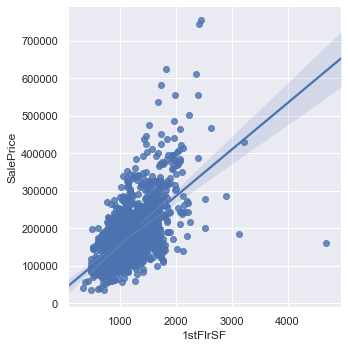

In [665]:
getInfo(train, a='SalePrice', b='1stFlrSF', i=13)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[num_candidates] = sc_X.fit_transform(X_train[num_candidates])
X_test[num_candidates] = sc_X.fit_transform(X_test[num_candidates])
y_train[num_candidates] = sc_X.fit_transform(y_train[num_candidates])
y_test[num_candidates] = sc_y.fit_transform(y_test[num_candidates])

In [ ]:
getInfo(train, a='SalePrice', b='1stFlrSF', i=13)

In [419]:
def impute_na_trees(df, col):
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
        df[col] = df[col].astype("object")
    else:
        df[col] = df[col].fillna(-99999)
    return df

def impute_na_no_trees(df, col):
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna("median")
    return df

In [420]:
for col in combined.columns:
    combined = impute_na_trees(combined, col)

In [452]:
num_candidates = combined.dtypes[combined.dtypes!="object"].index.values
len(num_candidates)

24

In [453]:
num_candidates

array(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold'], dtype=object)

In [454]:
cat_candidates = combined.dtypes[combined.dtypes=="object"].index.values
len(cat_candidates)

37

In [424]:
combined.isnull().sum().sum()

0

In [583]:
traindf = combined.iloc[0:train.shape[0]].copy()
traindf.loc[:, "target"] = np.log(train.SalePrice+1)
testdf = combined.iloc[train.shape[0]::].copy()

In [584]:
caat = []
nuum = []
x=0
y=0
for col in combined.columns:
    if col in num_candidates:
        x=x+1
        nuum.append(col)
        #print(x)
    else:
        caat.append(col)
        y=y+1
        
cat_candi = np.array(caat, dtype="object")
num_candi = np.array(nuum)
print(x, y)
type(caat), type(cat_candidates), type(cat_candi), type(nuum), type(num_candidates), type(num_candi)

25 49


(list, numpy.ndarray, numpy.ndarray, list, numpy.ndarray, numpy.ndarray)

In [589]:
cat_candi.astype("object")
num_candi.astype("float64")
cat_candi.dtype, num_candi.dtype

ValueError: could not convert string to float: 'Id'

In [591]:
combined[cat_candi].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 49 columns):
MSSubClass       2919 non-null object
MSZoning         2915 non-null object
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null object
OverallCond      2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non-null object
ExterQual        2919 non-null object
ExterCond        2919 non-null object
Foundation       2919 non-null object
BsmtQual         28

In [592]:
def impute_na_trees(df, col):
    if df[col].dtype == "object":
        df[col] = df[col].fillna("0")
        df[col] = df[col].astype("object")
    else:
        df[col] = df[col].fillna(-99999)
    return df

def impute_na_no_trees(df, col):
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna("median")
    return df

In [593]:
for nam in combined.columns:
    impute_na_trees(combined, nam)

In [637]:
for nam in combined_1.columns:
    impute_na_trees(combined_1, nam)

In [638]:
for nam in combined_2.columns:
    impute_na_trees(combined_2, nam)

In [639]:
for nam in combined_3.columns:
    impute_na_trees(combined_3, nam)

In [642]:
combined_1.info(), combined_2.info(), combined_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 63 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotArea          2919 non-null int64
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null object
OverallCond      2919 non-null object
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 non-null object
MasVnrArea       2919 non-null float64
ExterQual        2919 non-null object
ExterCond        2919 non-null object
Foundation       2919 non-null object
BsmtQual         2919 

(None, None, None)

In [607]:
traindf = combined.iloc[0:train.shape[0]].copy()
traindf.loc[:, "target"] = np.log(train.SalePrice+1)
testdf = combined.iloc[train.shape[0]::].copy()

In [597]:
traindf, holddf = train_test_split(traindf, test_size=0.22, random_state=0)
print((traindf.shape, holddf.shape, testdf.shape))

((1138, 75), (322, 75), (1459, 74))


In [598]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [599]:
cat_candidates

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

In [600]:
num_candidates

array(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [601]:
traindf.head(20)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
1120,1121,30,RM,8263,Pave,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,6,5,1920,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1012.0,1012.0,GasA,TA,Y,FuseA,1012,0,0,1012,0,0.0,1,0,2,1,TA,6,Typ,1,Detchd,1920.0,Unf,1,308.0,TA,TA,Y,0,22,112,0,0,0,0,5,2007,WD,Normal,11.681832
1031,1032,75,RL,15863,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,2.5Fin,7,3,1920,1970,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,523.0,Unf,0.0,301.0,824.0,GasA,Ex,Y,SBrkr,1687,998,397,3082,1,0.0,2,1,5,1,TA,12,Typ,2,Basment,1970.0,Fin,2,672.0,TA,TA,Y,136,63,0,0,0,0,0,8,2009,WD,Normal,12.190964
703,704,190,RM,7630,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2Story,5,9,1900,1996,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,Unf,0.0,Unf,0.0,360.0,360.0,GasA,Gd,Y,SBrkr,1032,780,0,1812,0,0.0,2,0,4,2,Gd,8,Typ,1,Detchd,1999.0,Unf,2,672.0,TA,TA,N,344,0,40,0,0,0,0,5,2010,WD,Normal,11.849405
641,642,60,FV,7050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,738.0,Unf,0.0,319.0,1057.0,GasA,Ex,Y,SBrkr,1057,872,0,1929,1,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2001.0,Fin,2,650.0,TA,TA,Y,0,235,0,0,0,0,0,5,2007,WD,Normal,12.328295
1331,1332,80,RL,10780,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,5,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,483.0,Unf,0.0,428.0,911.0,GasA,Gd,Y,SBrkr,954,0,0,954,0,0.0,1,0,3,1,TA,6,Typ,0,Detchd,1976.0,Unf,2,576.0,TA,TA,Y,0,0,0,0,0,0,0,7,2006,WD,Normal,11.794345
540,541,20,RL,14601,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,584.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1260.0,Unf,0.0,578.0,1838.0,GasA,Ex,Y,SBrkr,1838,0,0,1838,1,0.0,2,0,2,1,Ex,8,Typ,1,Attchd,2006.0,Fin,3,765.0,TA,TA,Y,270,68,0,0,0,0,0,3,2009,WD,Normal,12.660331
1161,1162,20,RL,14778,Pave,IR1,Low,AllPub,CulDSac,Gtl,Crawfor,PosN,Norm,1Fam,1Story,6,7,1954,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,72.0,Gd,TA,CBlock,TA,TA,No,BLQ,728.0,Unf,0.0,568.0,1296.0,GasA,Ex,Y,SBrkr,1640,0,0,1640,1,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1993.0,Unf,2,924.0,TA,TA,Y,108,0,0,216,0,0,0,11,2008,WD,Normal,12.319406
863,864,20,RL,7931,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,1148.0,Unf,0.0,0.0,1148.0,GasA,TA,Y,SBrkr,1148,0,0,1148,1,0.0,1,0,3,1,TA,6,Typ,0,Attchd,1959.0,Unf,1,672.0,TA,TA,Y,0,0,0,0,0,0,0,7,2009,WD,Normal,11.794345
1101,1102,20,RL,9758,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1971,1971,Gable,CompShg,HdBoard,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,412.0,LwQ,287.0,251.0,950.0,GasA,TA,Y,SBrkr,950,0,0,950,0,0.0,1,0,3,1,TA,5,Typ,0,Detchd,1981.0,Unf,1,280.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,WD,Normal,11.691080
506,507,60,RL,9554,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,GLQ,380.0,Unf,0.0,397.0,777.0,GasA,Ex,Y,SBrkr,1065,846,0,1911,0,0.0,2,1,3,1,Gd,8,Typ,1,Attchd,1993.0,RFn,2,471.0,TA,TA,Y,182,81,0,0,0,0,0,9,2006,WD,Normal,12.278398


In [603]:
ctb = CatBoostRegressor(random_seed=17, iterations=4000)

In [648]:
traindf = combined.iloc[0:train.shape[0]].copy()
traindf.loc[:, "target"] = np.log(train.SalePrice+1)
testdf = combined.iloc[train.shape[0]::].copy()

traindf_1 = combined_1.iloc[0:train_1.shape[0]].copy()
traindf_1.loc[:, "target"] = np.log(train.SalePrice+1)
testdf_1 = combined_1.iloc[train.shape[0]::].copy()

traindf_2 = combined_2.iloc[0:train.shape[0]].copy()
traindf_2.loc[:, "target"] = np.log(train.SalePrice+1)
testdf_2 = combined_2.iloc[train.shape[0]::].copy()

traindf_3 = combined_3.iloc[0:train.shape[0]].copy()
traindf_3.loc[:, "target"] = np.log(train.SalePrice+1)
testdf_3 = combined_3.iloc[train.shape[0]::].copy()

In [649]:
y_train = train['SalePrice']
X_train = traindf.drop('target', axis=1)
X_test = testdf

In [650]:
X_train_1 = traindf_1.drop('target', axis=1)
X_test_1 = testdf_1

In [651]:
X_train_2 = traindf_2.drop('target', axis=1)
X_test_2 = testdf_2

In [652]:
X_train_3 = traindf_3.drop('target', axis=1)
X_test_3 = testdf_3

In [609]:
pd.set_option('display.max_columns', None)
traindf[cat_candidates].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [479]:
num_cat = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

num_cat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [493]:
caat = []
nuum = []
x=0

for col in num_cat:
    if col in num_candidates:
        x=x+1
        nuum.append(col)
        #print(x)
    else:
        caat.append(col)
        
cat_candi = np.array(caat, dtype="object")
num_candi = np.array(nuum)
print(x)
type(caat), type(cat_candidates), type(cat_candi), type(nuum), type(num_candidates), type(num_candi)

0


(list, numpy.ndarray, numpy.ndarray, list, numpy.ndarray, numpy.ndarray)

In [494]:
cat_candi


array(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars'], dtype=object)

In [496]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_train)

'multiclass'

In [497]:
for col in cat_candidates:
    combined[col] = combined[col].astype("object")

In [498]:
cat_candi.astype("object")
cat_candi.dtype

dtype('O')

In [500]:
cat_candidates.dtype

dtype('O')

In [491]:
for col in cat_candi:
    print(traindf[col].dtype)

object
object
object
object
object
object
object
object
object
object


In [ ]:
train["a"] = train["a"].astype(np.int) 

In [636]:
X_train.shape, X_test.shape

((1460, 74), (1459, 74))

In [660]:
%%time
ctb.fit(X_train, y_train,
        cat_features=cat_candidates);

0:	learn: 77806.5288888	total: 12.9ms	remaining: 51.6s
1:	learn: 76220.2469793	total: 25.1ms	remaining: 50.2s
2:	learn: 74844.3308513	total: 39ms	remaining: 52s
3:	learn: 73408.3994549	total: 50.6ms	remaining: 50.5s
4:	learn: 72031.7745367	total: 63.8ms	remaining: 51s
5:	learn: 70656.4383360	total: 78ms	remaining: 52s
6:	learn: 69512.8152456	total: 90.5ms	remaining: 51.6s
7:	learn: 68152.8635624	total: 103ms	remaining: 51.5s
8:	learn: 67007.4580587	total: 116ms	remaining: 51.4s
9:	learn: 65881.5148421	total: 127ms	remaining: 50.7s
10:	learn: 64706.2474561	total: 142ms	remaining: 51.6s
11:	learn: 63554.3412235	total: 155ms	remaining: 51.4s
12:	learn: 62480.5462150	total: 165ms	remaining: 50.8s
13:	learn: 61375.9748513	total: 177ms	remaining: 50.3s
14:	learn: 60308.1013956	total: 190ms	remaining: 50.5s
15:	learn: 59384.5730555	total: 198ms	remaining: 49.2s
16:	learn: 58321.9150406	total: 210ms	remaining: 49.3s
17:	learn: 57393.9933543	total: 223ms	remaining: 49.4s
18:	learn: 56505.966524

159:	learn: 21836.7140213	total: 2.85s	remaining: 1m 8s
160:	learn: 21775.9110439	total: 2.86s	remaining: 1m 8s
161:	learn: 21713.2101686	total: 2.88s	remaining: 1m 8s
162:	learn: 21681.5504781	total: 2.89s	remaining: 1m 8s
163:	learn: 21637.3652987	total: 2.9s	remaining: 1m 8s
164:	learn: 21598.4076463	total: 2.91s	remaining: 1m 8s
165:	learn: 21546.3251662	total: 2.92s	remaining: 1m 7s
166:	learn: 21534.8687791	total: 2.93s	remaining: 1m 7s
167:	learn: 21471.2465367	total: 2.94s	remaining: 1m 7s
168:	learn: 21437.8589965	total: 2.96s	remaining: 1m 7s
169:	learn: 21375.5411969	total: 2.97s	remaining: 1m 7s
170:	learn: 21324.4781428	total: 2.98s	remaining: 1m 7s
171:	learn: 21303.9501716	total: 3s	remaining: 1m 7s
172:	learn: 21260.7986733	total: 3.02s	remaining: 1m 7s
173:	learn: 21234.9148890	total: 3.03s	remaining: 1m 7s
174:	learn: 21164.8952100	total: 3.05s	remaining: 1m 7s
175:	learn: 21104.2580770	total: 3.06s	remaining: 1m 6s
176:	learn: 21049.1326711	total: 3.08s	remaining: 1m

322:	learn: 17199.5126719	total: 4.9s	remaining: 56.1s
323:	learn: 17192.5779416	total: 4.91s	remaining: 56.1s
324:	learn: 17161.7648002	total: 4.92s	remaining: 56s
325:	learn: 17151.9575505	total: 4.94s	remaining: 56s
326:	learn: 17139.7501155	total: 4.96s	remaining: 56s
327:	learn: 17115.3508648	total: 4.97s	remaining: 56s
328:	learn: 17094.7914641	total: 4.98s	remaining: 56s
329:	learn: 17070.9330438	total: 5s	remaining: 55.9s
330:	learn: 17063.2784499	total: 5.01s	remaining: 55.9s
331:	learn: 17043.1586565	total: 5.02s	remaining: 55.8s
332:	learn: 17018.0354607	total: 5.03s	remaining: 55.7s
333:	learn: 16993.2634360	total: 5.04s	remaining: 55.7s
334:	learn: 16971.8542049	total: 5.06s	remaining: 55.7s
335:	learn: 16944.8393288	total: 5.07s	remaining: 55.6s
336:	learn: 16932.5352045	total: 5.08s	remaining: 55.6s
337:	learn: 16919.3897445	total: 5.09s	remaining: 55.5s
338:	learn: 16906.7613750	total: 5.11s	remaining: 55.6s
339:	learn: 16899.6455907	total: 5.93s	remaining: 1m 4s
340:	l

484:	learn: 14976.9557150	total: 7.94s	remaining: 57.8s
485:	learn: 14958.0067872	total: 7.95s	remaining: 57.7s
486:	learn: 14937.5257359	total: 7.97s	remaining: 57.7s
487:	learn: 14928.1573304	total: 7.99s	remaining: 57.7s
488:	learn: 14917.3629900	total: 8s	remaining: 57.7s
489:	learn: 14896.9146648	total: 8.02s	remaining: 57.6s
490:	learn: 14895.7194299	total: 8.03s	remaining: 57.6s
491:	learn: 14894.1278364	total: 8.04s	remaining: 57.6s
492:	learn: 14884.6517057	total: 8.05s	remaining: 57.5s
493:	learn: 14868.1296699	total: 8.07s	remaining: 57.5s
494:	learn: 14858.1123560	total: 8.08s	remaining: 57.5s
495:	learn: 14850.7448443	total: 8.09s	remaining: 57.4s
496:	learn: 14842.0920544	total: 8.11s	remaining: 57.4s
497:	learn: 14832.0224621	total: 8.12s	remaining: 57.3s
498:	learn: 14817.3562284	total: 8.13s	remaining: 57.3s
499:	learn: 14816.4649867	total: 8.15s	remaining: 57.3s
500:	learn: 14810.4802513	total: 8.17s	remaining: 57.3s
501:	learn: 14798.4284648	total: 8.18s	remaining: 5

634:	learn: 13567.6538817	total: 11.6s	remaining: 1m 1s
635:	learn: 13549.9982593	total: 11.6s	remaining: 1m 1s
636:	learn: 13543.1554731	total: 11.6s	remaining: 1m 1s
637:	learn: 13533.1908698	total: 11.6s	remaining: 1m 1s
638:	learn: 13526.7518127	total: 11.6s	remaining: 1m 1s
639:	learn: 13512.5347741	total: 11.6s	remaining: 1m 1s
640:	learn: 13501.8172762	total: 11.7s	remaining: 1m 1s
641:	learn: 13500.9939252	total: 11.7s	remaining: 1m 1s
642:	learn: 13492.1683325	total: 11.7s	remaining: 1m 1s
643:	learn: 13488.9532064	total: 11.7s	remaining: 1m 1s
644:	learn: 13483.4393694	total: 11.7s	remaining: 1m 1s
645:	learn: 13473.6864136	total: 11.7s	remaining: 1m 1s
646:	learn: 13456.1122190	total: 11.7s	remaining: 1m 1s
647:	learn: 13443.8592418	total: 11.7s	remaining: 1m 1s
648:	learn: 13434.5229868	total: 11.8s	remaining: 1m 1s
649:	learn: 13431.1973002	total: 11.8s	remaining: 1m 1s
650:	learn: 13425.9121847	total: 11.8s	remaining: 1m 1s
651:	learn: 13421.0781932	total: 11.8s	remaining

788:	learn: 12282.3203580	total: 13.9s	remaining: 56.7s
789:	learn: 12277.2415719	total: 13.9s	remaining: 56.7s
790:	learn: 12266.1977332	total: 13.9s	remaining: 56.6s
791:	learn: 12258.1034349	total: 13.9s	remaining: 56.6s
792:	learn: 12257.5954919	total: 13.9s	remaining: 56.6s
793:	learn: 12250.1698203	total: 13.9s	remaining: 56.6s
794:	learn: 12236.2158624	total: 13.9s	remaining: 56.5s
795:	learn: 12230.5874998	total: 14s	remaining: 56.5s
796:	learn: 12218.6662448	total: 14s	remaining: 56.4s
797:	learn: 12211.7378755	total: 14s	remaining: 56.4s
798:	learn: 12200.4679863	total: 14s	remaining: 56.4s
799:	learn: 12190.5311292	total: 14s	remaining: 56.3s
800:	learn: 12177.6870061	total: 14s	remaining: 56.3s
801:	learn: 12167.5846546	total: 14s	remaining: 56.3s
802:	learn: 12164.2636646	total: 14s	remaining: 56.2s
803:	learn: 12153.0736422	total: 14.1s	remaining: 56.2s
804:	learn: 12152.3040097	total: 14.1s	remaining: 56.1s
805:	learn: 12145.0275190	total: 14.1s	remaining: 56.1s
806:	lea

939:	learn: 11284.1469048	total: 15.9s	remaining: 52s
940:	learn: 11279.5679800	total: 15.9s	remaining: 52s
941:	learn: 11273.2833798	total: 15.9s	remaining: 52s
942:	learn: 11268.4440046	total: 15.9s	remaining: 51.9s
943:	learn: 11268.1623187	total: 16s	remaining: 51.9s
944:	learn: 11259.4455210	total: 16s	remaining: 51.9s
945:	learn: 11247.0818339	total: 16s	remaining: 51.8s
946:	learn: 11242.8671077	total: 16s	remaining: 51.8s
947:	learn: 11233.1685307	total: 16s	remaining: 51.8s
948:	learn: 11229.1973008	total: 16s	remaining: 51.7s
949:	learn: 11224.1850357	total: 16s	remaining: 51.7s
950:	learn: 11216.4790482	total: 16.1s	remaining: 51.7s
951:	learn: 11208.5340645	total: 16.1s	remaining: 51.7s
952:	learn: 11196.6913526	total: 16.1s	remaining: 51.6s
953:	learn: 11196.1838659	total: 16.1s	remaining: 51.6s
954:	learn: 11191.4271078	total: 16.1s	remaining: 51.6s
955:	learn: 11189.3181239	total: 16.1s	remaining: 51.5s
956:	learn: 11180.3936155	total: 16.1s	remaining: 51.5s
957:	learn: 

1087:	learn: 10488.6479548	total: 19.6s	remaining: 52.6s
1088:	learn: 10480.9940069	total: 19.6s	remaining: 52.6s
1089:	learn: 10470.1672979	total: 19.6s	remaining: 52.6s
1090:	learn: 10462.4896455	total: 19.6s	remaining: 52.6s
1091:	learn: 10453.3758489	total: 19.6s	remaining: 52.5s
1092:	learn: 10450.4677857	total: 19.6s	remaining: 52.5s
1093:	learn: 10447.3018082	total: 19.6s	remaining: 52.5s
1094:	learn: 10441.1342028	total: 19.7s	remaining: 52.5s
1095:	learn: 10438.6649031	total: 19.7s	remaining: 52.4s
1096:	learn: 10433.3239037	total: 19.7s	remaining: 52.4s
1097:	learn: 10426.8798934	total: 19.7s	remaining: 52.4s
1098:	learn: 10421.5076025	total: 19.7s	remaining: 52.3s
1099:	learn: 10415.2179005	total: 19.7s	remaining: 52.3s
1100:	learn: 10406.4450722	total: 19.7s	remaining: 52.3s
1101:	learn: 10404.0272757	total: 19.8s	remaining: 52.2s
1102:	learn: 10397.5966531	total: 19.8s	remaining: 52.2s
1103:	learn: 10392.2855162	total: 19.8s	remaining: 52.2s
1104:	learn: 10385.2914851	tota

1233:	learn: 9675.2728140	total: 21.6s	remaining: 48.6s
1234:	learn: 9669.3555561	total: 21.6s	remaining: 48.6s
1235:	learn: 9666.7016892	total: 21.6s	remaining: 48.6s
1236:	learn: 9664.0353971	total: 21.6s	remaining: 48.6s
1237:	learn: 9654.2080372	total: 21.7s	remaining: 48.5s
1238:	learn: 9648.1064955	total: 21.7s	remaining: 48.5s
1239:	learn: 9640.7100039	total: 21.7s	remaining: 48.5s
1240:	learn: 9635.3155785	total: 21.7s	remaining: 48.5s
1241:	learn: 9628.7541906	total: 21.7s	remaining: 48.5s
1242:	learn: 9622.4582304	total: 21.7s	remaining: 48.4s
1243:	learn: 9621.0062709	total: 21.7s	remaining: 48.4s
1244:	learn: 9613.8889027	total: 21.8s	remaining: 48.4s
1245:	learn: 9611.8478735	total: 21.8s	remaining: 48.3s
1246:	learn: 9602.5784125	total: 21.8s	remaining: 48.3s
1247:	learn: 9601.5256034	total: 21.8s	remaining: 48.3s
1248:	learn: 9601.2986611	total: 21.8s	remaining: 48.3s
1249:	learn: 9596.9012445	total: 21.8s	remaining: 48.2s
1250:	learn: 9585.2488492	total: 21.8s	remaining

1381:	learn: 8993.5871499	total: 23.6s	remaining: 45s
1382:	learn: 8988.8864236	total: 23.7s	remaining: 45s
1383:	learn: 8985.9678563	total: 23.7s	remaining: 44.9s
1384:	learn: 8985.6000947	total: 23.7s	remaining: 44.9s
1385:	learn: 8984.9913620	total: 23.7s	remaining: 44.9s
1386:	learn: 8984.4994685	total: 23.7s	remaining: 44.9s
1387:	learn: 8983.9018037	total: 23.7s	remaining: 44.8s
1388:	learn: 8983.4696317	total: 23.7s	remaining: 44.8s
1389:	learn: 8973.3384220	total: 23.7s	remaining: 44.8s
1390:	learn: 8956.9431771	total: 23.8s	remaining: 44.8s
1391:	learn: 8947.2561738	total: 23.8s	remaining: 44.7s
1392:	learn: 8941.9162593	total: 23.8s	remaining: 44.7s
1393:	learn: 8930.5093376	total: 23.8s	remaining: 44.7s
1394:	learn: 8918.2910433	total: 23.8s	remaining: 44.7s
1395:	learn: 8906.1849796	total: 23.8s	remaining: 44.6s
1396:	learn: 8903.9659417	total: 23.8s	remaining: 44.6s
1397:	learn: 8895.1571273	total: 23.9s	remaining: 44.6s
1398:	learn: 8885.0332249	total: 23.9s	remaining: 44

1541:	learn: 8305.1594751	total: 25.9s	remaining: 41.4s
1542:	learn: 8296.1913230	total: 25.9s	remaining: 41.4s
1543:	learn: 8287.0464721	total: 25.9s	remaining: 41.4s
1544:	learn: 8285.6384479	total: 25.9s	remaining: 41.3s
1545:	learn: 8285.3386482	total: 25.9s	remaining: 41.3s
1546:	learn: 8277.7203216	total: 25.9s	remaining: 41.3s
1547:	learn: 8270.7786316	total: 25.9s	remaining: 41.3s
1548:	learn: 8270.5419630	total: 26s	remaining: 41.2s
1549:	learn: 8269.1451692	total: 26s	remaining: 41.2s
1550:	learn: 8266.4692046	total: 26s	remaining: 41.2s
1551:	learn: 8266.1787226	total: 26s	remaining: 41.2s
1552:	learn: 8260.3095149	total: 26s	remaining: 41.2s
1553:	learn: 8258.2843531	total: 26s	remaining: 41.1s
1554:	learn: 8254.6123072	total: 26s	remaining: 41.1s
1555:	learn: 8254.5279448	total: 26.1s	remaining: 41.1s
1556:	learn: 8251.7493688	total: 26.1s	remaining: 41.1s
1557:	learn: 8247.4999419	total: 26.1s	remaining: 41s
1558:	learn: 8244.1551794	total: 26.1s	remaining: 41s
1559:	lear

1700:	learn: 7719.7837126	total: 28.1s	remaining: 38.1s
1701:	learn: 7717.2052189	total: 28.1s	remaining: 38.1s
1702:	learn: 7713.9258481	total: 28.1s	remaining: 38.1s
1703:	learn: 7713.8343950	total: 28.2s	remaining: 38.1s
1704:	learn: 7708.0034133	total: 28.2s	remaining: 38.1s
1705:	learn: 7705.4101616	total: 28.2s	remaining: 38s
1706:	learn: 7700.4468659	total: 28.2s	remaining: 38s
1707:	learn: 7698.5464775	total: 28.2s	remaining: 38s
1708:	learn: 7696.0267691	total: 28.2s	remaining: 38s
1709:	learn: 7690.0548801	total: 28.2s	remaining: 37.9s
1710:	learn: 7684.9805246	total: 28.2s	remaining: 37.9s
1711:	learn: 7684.3459576	total: 28.3s	remaining: 37.9s
1712:	learn: 7680.5970804	total: 28.3s	remaining: 37.9s
1713:	learn: 7680.4225957	total: 28.3s	remaining: 37.9s
1714:	learn: 7677.1781960	total: 28.3s	remaining: 37.8s
1715:	learn: 7673.4683032	total: 28.3s	remaining: 37.8s
1716:	learn: 7664.9114884	total: 28.3s	remaining: 37.8s
1717:	learn: 7660.9108157	total: 28.3s	remaining: 37.8s


1859:	learn: 7169.1472206	total: 30.4s	remaining: 35.1s
1860:	learn: 7163.7898020	total: 30.4s	remaining: 35s
1861:	learn: 7156.6184797	total: 30.4s	remaining: 35s
1862:	learn: 7153.7690432	total: 30.4s	remaining: 35s
1863:	learn: 7153.3436563	total: 30.4s	remaining: 35s
1864:	learn: 7150.2291461	total: 30.4s	remaining: 35s
1865:	learn: 7148.7812400	total: 30.4s	remaining: 34.9s
1866:	learn: 7145.9950118	total: 30.5s	remaining: 34.9s
1867:	learn: 7144.0533354	total: 30.5s	remaining: 34.9s
1868:	learn: 7139.9627548	total: 30.5s	remaining: 34.9s
1869:	learn: 7137.7327169	total: 30.5s	remaining: 34.9s
1870:	learn: 7137.6326047	total: 30.5s	remaining: 34.9s
1871:	learn: 7133.6360400	total: 30.5s	remaining: 34.8s
1872:	learn: 7130.7007796	total: 30.6s	remaining: 34.8s
1873:	learn: 7130.4599232	total: 30.6s	remaining: 34.8s
1874:	learn: 7130.2404960	total: 30.6s	remaining: 34.8s
1875:	learn: 7130.0546659	total: 30.6s	remaining: 34.8s
1876:	learn: 7127.7515174	total: 30.6s	remaining: 34.7s
18

2021:	learn: 6726.6348994	total: 33.4s	remaining: 32.8s
2022:	learn: 6724.9830872	total: 33.4s	remaining: 32.8s
2023:	learn: 6717.0158996	total: 33.4s	remaining: 32.8s
2024:	learn: 6714.2563831	total: 33.5s	remaining: 32.7s
2025:	learn: 6714.0842788	total: 33.5s	remaining: 32.7s
2026:	learn: 6713.6943613	total: 33.5s	remaining: 32.7s
2027:	learn: 6710.1612341	total: 33.5s	remaining: 32.7s
2028:	learn: 6706.2116054	total: 33.5s	remaining: 32.7s
2029:	learn: 6704.0943224	total: 33.5s	remaining: 32.6s
2030:	learn: 6702.8171353	total: 33.5s	remaining: 32.6s
2031:	learn: 6694.3262864	total: 33.5s	remaining: 32.6s
2032:	learn: 6690.5199406	total: 33.6s	remaining: 32.6s
2033:	learn: 6688.6248304	total: 33.6s	remaining: 32.6s
2034:	learn: 6684.0657848	total: 33.6s	remaining: 32.5s
2035:	learn: 6681.4695954	total: 33.6s	remaining: 32.5s
2036:	learn: 6677.1265826	total: 33.6s	remaining: 32.5s
2037:	learn: 6674.6051124	total: 33.6s	remaining: 32.5s
2038:	learn: 6672.0222803	total: 33.6s	remaining

2170:	learn: 6276.3150996	total: 35.5s	remaining: 30s
2171:	learn: 6273.6584432	total: 35.5s	remaining: 30s
2172:	learn: 6267.7286045	total: 35.5s	remaining: 29.9s
2173:	learn: 6266.4861048	total: 35.5s	remaining: 29.9s
2174:	learn: 6266.4151046	total: 35.5s	remaining: 29.9s
2175:	learn: 6266.0765401	total: 35.6s	remaining: 29.9s
2176:	learn: 6261.9400315	total: 35.6s	remaining: 29.9s
2177:	learn: 6258.4064760	total: 35.6s	remaining: 29.9s
2178:	learn: 6257.1240898	total: 35.6s	remaining: 29.8s
2179:	learn: 6254.1440760	total: 35.6s	remaining: 29.8s
2180:	learn: 6252.5369596	total: 35.6s	remaining: 29.8s
2181:	learn: 6246.6521855	total: 35.6s	remaining: 29.8s
2182:	learn: 6246.3494339	total: 35.6s	remaining: 29.8s
2183:	learn: 6244.9551922	total: 35.7s	remaining: 29.8s
2184:	learn: 6241.8648841	total: 35.7s	remaining: 29.7s
2185:	learn: 6240.2082666	total: 35.7s	remaining: 29.7s
2186:	learn: 6239.6988072	total: 35.7s	remaining: 29.7s
2187:	learn: 6236.8321381	total: 35.7s	remaining: 29

2318:	learn: 5906.3720814	total: 39.9s	remaining: 29.1s
2319:	learn: 5903.8016137	total: 39.9s	remaining: 29s
2320:	learn: 5903.7271038	total: 39.9s	remaining: 29s
2321:	learn: 5902.8071493	total: 40s	remaining: 29s
2322:	learn: 5901.1457383	total: 40s	remaining: 29s
2323:	learn: 5901.1008999	total: 40s	remaining: 29s
2324:	learn: 5900.1345777	total: 40s	remaining: 28.9s
2325:	learn: 5896.7776134	total: 40s	remaining: 28.9s
2326:	learn: 5892.9225294	total: 40s	remaining: 28.9s
2327:	learn: 5888.7469003	total: 40s	remaining: 28.9s
2328:	learn: 5886.7875604	total: 40.1s	remaining: 28.9s
2329:	learn: 5884.9910439	total: 40.1s	remaining: 28.8s
2330:	learn: 5883.7453107	total: 40.1s	remaining: 28.8s
2331:	learn: 5882.1671085	total: 40.1s	remaining: 28.8s
2332:	learn: 5879.1987475	total: 40.1s	remaining: 28.8s
2333:	learn: 5873.5495917	total: 40.1s	remaining: 28.8s
2334:	learn: 5872.3041759	total: 40.1s	remaining: 28.8s
2335:	learn: 5870.3025559	total: 40.2s	remaining: 28.7s
2336:	learn: 586

2473:	learn: 5565.9108977	total: 44.6s	remaining: 27.6s
2474:	learn: 5564.1275714	total: 44.6s	remaining: 27.6s
2475:	learn: 5561.0758933	total: 44.6s	remaining: 27.6s
2476:	learn: 5560.9698067	total: 44.6s	remaining: 27.6s
2477:	learn: 5558.6442672	total: 44.6s	remaining: 27.5s
2478:	learn: 5552.4719190	total: 44.6s	remaining: 27.5s
2479:	learn: 5545.2698006	total: 44.7s	remaining: 27.5s
2480:	learn: 5542.3570554	total: 44.7s	remaining: 27.5s
2481:	learn: 5540.9462011	total: 44.7s	remaining: 27.5s
2482:	learn: 5540.8321572	total: 44.7s	remaining: 27.4s
2483:	learn: 5537.1836898	total: 44.7s	remaining: 27.4s
2484:	learn: 5535.7579302	total: 44.7s	remaining: 27.4s
2485:	learn: 5532.1081156	total: 44.7s	remaining: 27.4s
2486:	learn: 5527.9102801	total: 44.8s	remaining: 27.4s
2487:	learn: 5527.5496252	total: 44.8s	remaining: 27.3s
2488:	learn: 5527.1599542	total: 44.8s	remaining: 27.3s
2489:	learn: 5526.4263955	total: 44.8s	remaining: 27.3s
2490:	learn: 5523.8282959	total: 44.8s	remaining

2626:	learn: 5274.2894170	total: 46.8s	remaining: 24.6s
2627:	learn: 5274.2239142	total: 46.9s	remaining: 24.6s
2628:	learn: 5272.8483134	total: 46.9s	remaining: 24.6s
2629:	learn: 5271.7772284	total: 46.9s	remaining: 24.5s
2630:	learn: 5269.2680133	total: 46.9s	remaining: 24.5s
2631:	learn: 5267.1858682	total: 46.9s	remaining: 24.5s
2632:	learn: 5262.8548258	total: 46.9s	remaining: 24.5s
2633:	learn: 5261.1032500	total: 46.9s	remaining: 24.5s
2634:	learn: 5258.0633979	total: 46.9s	remaining: 24.4s
2635:	learn: 5256.9915481	total: 47s	remaining: 24.4s
2636:	learn: 5255.2822284	total: 47s	remaining: 24.4s
2637:	learn: 5253.0507056	total: 47s	remaining: 24.4s
2638:	learn: 5250.6178145	total: 47s	remaining: 24.4s
2639:	learn: 5249.9216239	total: 47s	remaining: 24.3s
2640:	learn: 5245.9024169	total: 47s	remaining: 24.3s
2641:	learn: 5241.2038444	total: 47s	remaining: 24.3s
2642:	learn: 5240.7424602	total: 47.1s	remaining: 24.3s
2643:	learn: 5239.4271902	total: 47.1s	remaining: 24.3s
2644:	

2784:	learn: 4975.0835402	total: 49.9s	remaining: 21.9s
2785:	learn: 4972.7002143	total: 49.9s	remaining: 21.8s
2786:	learn: 4972.4814530	total: 49.9s	remaining: 21.8s
2787:	learn: 4969.4742365	total: 49.9s	remaining: 21.8s
2788:	learn: 4969.3482984	total: 49.9s	remaining: 21.8s
2789:	learn: 4968.1479082	total: 49.9s	remaining: 21.8s
2790:	learn: 4967.4915785	total: 49.9s	remaining: 21.7s
2791:	learn: 4965.4592788	total: 50s	remaining: 21.7s
2792:	learn: 4962.3526563	total: 50s	remaining: 21.7s
2793:	learn: 4960.2544121	total: 50s	remaining: 21.7s
2794:	learn: 4958.6411653	total: 50s	remaining: 21.7s
2795:	learn: 4957.2038343	total: 50s	remaining: 21.6s
2796:	learn: 4956.9941577	total: 50s	remaining: 21.6s
2797:	learn: 4956.9111832	total: 50s	remaining: 21.6s
2798:	learn: 4956.0825521	total: 50.1s	remaining: 21.6s
2799:	learn: 4954.3716441	total: 50.1s	remaining: 21.6s
2800:	learn: 4949.9835232	total: 50.1s	remaining: 21.5s
2801:	learn: 4945.3738309	total: 50.1s	remaining: 21.5s
2802:	

2943:	learn: 4720.7595322	total: 52.9s	remaining: 19.1s
2944:	learn: 4718.2967911	total: 52.9s	remaining: 19.1s
2945:	learn: 4714.1645013	total: 52.9s	remaining: 19s
2946:	learn: 4713.4163586	total: 52.9s	remaining: 19s
2947:	learn: 4710.4624195	total: 53s	remaining: 19s
2948:	learn: 4709.2031161	total: 53s	remaining: 19s
2949:	learn: 4708.8396589	total: 53s	remaining: 19s
2950:	learn: 4707.1465794	total: 53s	remaining: 18.9s
2951:	learn: 4705.3610510	total: 53s	remaining: 18.9s
2952:	learn: 4704.8790683	total: 53s	remaining: 18.9s
2953:	learn: 4703.4016118	total: 53s	remaining: 18.9s
2954:	learn: 4699.3189773	total: 53.1s	remaining: 18.9s
2955:	learn: 4697.3414820	total: 53.1s	remaining: 18.8s
2956:	learn: 4693.9233880	total: 53.1s	remaining: 18.8s
2957:	learn: 4690.6518667	total: 53.1s	remaining: 18.8s
2958:	learn: 4689.4775445	total: 53.1s	remaining: 18.8s
2959:	learn: 4687.4544081	total: 53.1s	remaining: 18.8s
2960:	learn: 4687.1173704	total: 53.1s	remaining: 18.7s
2961:	learn: 468

3102:	learn: 4446.1823596	total: 56.8s	remaining: 16.5s
3103:	learn: 4442.7602643	total: 56.8s	remaining: 16.5s
3104:	learn: 4441.5038124	total: 56.8s	remaining: 16.5s
3105:	learn: 4438.7411343	total: 56.8s	remaining: 16.4s
3106:	learn: 4436.3479722	total: 56.8s	remaining: 16.4s
3107:	learn: 4435.5603871	total: 56.8s	remaining: 16.4s
3108:	learn: 4434.0809896	total: 56.8s	remaining: 16.4s
3109:	learn: 4432.1719423	total: 56.9s	remaining: 16.4s
3110:	learn: 4431.7183694	total: 56.9s	remaining: 16.3s
3111:	learn: 4431.5218137	total: 56.9s	remaining: 16.3s
3112:	learn: 4431.1836347	total: 56.9s	remaining: 16.3s
3113:	learn: 4429.0929233	total: 56.9s	remaining: 16.3s
3114:	learn: 4427.9044731	total: 56.9s	remaining: 16.3s
3115:	learn: 4427.5807010	total: 57s	remaining: 16.2s
3116:	learn: 4425.5220097	total: 57s	remaining: 16.2s
3117:	learn: 4425.5020458	total: 57s	remaining: 16.2s
3118:	learn: 4424.5891355	total: 57s	remaining: 16.2s
3119:	learn: 4423.7157885	total: 57s	remaining: 16.2s
31

3262:	learn: 4206.0931254	total: 59.8s	remaining: 13.6s
3263:	learn: 4204.8184773	total: 59.8s	remaining: 13.6s
3264:	learn: 4204.1337129	total: 59.8s	remaining: 13.5s
3265:	learn: 4200.3357445	total: 59.9s	remaining: 13.5s
3266:	learn: 4200.2559183	total: 59.9s	remaining: 13.5s
3267:	learn: 4197.0732589	total: 59.9s	remaining: 13.5s
3268:	learn: 4193.5933854	total: 59.9s	remaining: 13.5s
3269:	learn: 4193.1614267	total: 59.9s	remaining: 13.4s
3270:	learn: 4190.6867410	total: 59.9s	remaining: 13.4s
3271:	learn: 4189.3071936	total: 59.9s	remaining: 13.4s
3272:	learn: 4188.9235565	total: 60s	remaining: 13.4s
3273:	learn: 4188.0663981	total: 60s	remaining: 13.4s
3274:	learn: 4186.8852317	total: 60s	remaining: 13.3s
3275:	learn: 4183.7919551	total: 60s	remaining: 13.3s
3276:	learn: 4183.2495195	total: 1m	remaining: 13.3s
3277:	learn: 4181.7283945	total: 1m	remaining: 13.3s
3278:	learn: 4180.3962391	total: 1m	remaining: 13.3s
3279:	learn: 4179.4961372	total: 1m	remaining: 13.3s
3280:	learn:

3419:	learn: 3984.4762127	total: 1m 2s	remaining: 10.6s
3420:	learn: 3984.1124094	total: 1m 2s	remaining: 10.6s
3421:	learn: 3982.0819881	total: 1m 2s	remaining: 10.5s
3422:	learn: 3982.0604517	total: 1m 2s	remaining: 10.5s
3423:	learn: 3981.0550392	total: 1m 2s	remaining: 10.5s
3424:	learn: 3980.9053497	total: 1m 2s	remaining: 10.5s
3425:	learn: 3979.7173537	total: 1m 2s	remaining: 10.5s
3426:	learn: 3979.6106788	total: 1m 2s	remaining: 10.4s
3427:	learn: 3978.3720110	total: 1m 2s	remaining: 10.4s
3428:	learn: 3977.2229071	total: 1m 2s	remaining: 10.4s
3429:	learn: 3975.8269255	total: 1m 2s	remaining: 10.4s
3430:	learn: 3973.5434508	total: 1m 2s	remaining: 10.4s
3431:	learn: 3973.3292349	total: 1m 2s	remaining: 10.4s
3432:	learn: 3971.9795134	total: 1m 2s	remaining: 10.3s
3433:	learn: 3971.9415274	total: 1m 2s	remaining: 10.3s
3434:	learn: 3971.9142586	total: 1m 2s	remaining: 10.3s
3435:	learn: 3971.9060896	total: 1m 2s	remaining: 10.3s
3436:	learn: 3971.8823862	total: 1m 2s	remaining

3574:	learn: 3793.0660229	total: 1m 4s	remaining: 7.68s
3575:	learn: 3792.7867094	total: 1m 5s	remaining: 7.76s
3576:	learn: 3791.5910781	total: 1m 5s	remaining: 7.74s
3577:	learn: 3791.2757343	total: 1m 5s	remaining: 7.72s
3578:	learn: 3790.6153531	total: 1m 5s	remaining: 7.71s
3579:	learn: 3789.6613871	total: 1m 5s	remaining: 7.69s
3580:	learn: 3789.0975009	total: 1m 5s	remaining: 7.67s
3581:	learn: 3787.1118110	total: 1m 5s	remaining: 7.65s
3582:	learn: 3786.0392519	total: 1m 5s	remaining: 7.63s
3583:	learn: 3785.3301786	total: 1m 5s	remaining: 7.61s
3584:	learn: 3784.7321972	total: 1m 5s	remaining: 7.59s
3585:	learn: 3783.6785531	total: 1m 5s	remaining: 7.57s
3586:	learn: 3782.9779176	total: 1m 5s	remaining: 7.55s
3587:	learn: 3780.7698520	total: 1m 5s	remaining: 7.54s
3588:	learn: 3778.6438529	total: 1m 5s	remaining: 7.52s
3589:	learn: 3777.6742204	total: 1m 5s	remaining: 7.5s
3590:	learn: 3776.2845207	total: 1m 5s	remaining: 7.48s
3591:	learn: 3774.3051529	total: 1m 5s	remaining:

3731:	learn: 3605.0033331	total: 1m 7s	remaining: 4.86s
3732:	learn: 3604.0916378	total: 1m 7s	remaining: 4.84s
3733:	learn: 3603.5535256	total: 1m 7s	remaining: 4.82s
3734:	learn: 3602.2794272	total: 1m 7s	remaining: 4.81s
3735:	learn: 3601.8665579	total: 1m 7s	remaining: 4.79s
3736:	learn: 3601.7382435	total: 1m 7s	remaining: 4.77s
3737:	learn: 3600.4464983	total: 1m 7s	remaining: 4.75s
3738:	learn: 3599.8053172	total: 1m 7s	remaining: 4.73s
3739:	learn: 3599.3432403	total: 1m 7s	remaining: 4.71s
3740:	learn: 3598.8896003	total: 1m 7s	remaining: 4.7s
3741:	learn: 3595.9749042	total: 1m 7s	remaining: 4.68s
3742:	learn: 3594.3458611	total: 1m 7s	remaining: 4.66s
3743:	learn: 3593.3250934	total: 1m 7s	remaining: 4.64s
3744:	learn: 3591.1259989	total: 1m 7s	remaining: 4.62s
3745:	learn: 3590.7701581	total: 1m 7s	remaining: 4.61s
3746:	learn: 3590.0658450	total: 1m 7s	remaining: 4.59s
3747:	learn: 3588.7356746	total: 1m 7s	remaining: 4.57s
3748:	learn: 3586.7814154	total: 1m 7s	remaining:

3885:	learn: 3443.2265785	total: 1m 9s	remaining: 2.05s
3886:	learn: 3442.9314647	total: 1m 9s	remaining: 2.03s
3887:	learn: 3441.8500602	total: 1m 9s	remaining: 2.02s
3888:	learn: 3441.1867678	total: 1m 9s	remaining: 2s
3889:	learn: 3438.9667742	total: 1m 9s	remaining: 1.98s
3890:	learn: 3438.0983279	total: 1m 9s	remaining: 1.96s
3891:	learn: 3436.1501990	total: 1m 9s	remaining: 1.94s
3892:	learn: 3435.7811103	total: 1m 9s	remaining: 1.93s
3893:	learn: 3434.7823536	total: 1m 9s	remaining: 1.91s
3894:	learn: 3433.9219488	total: 1m 9s	remaining: 1.89s
3895:	learn: 3430.8502811	total: 1m 9s	remaining: 1.87s
3896:	learn: 3430.1486212	total: 1m 9s	remaining: 1.85s
3897:	learn: 3430.0588883	total: 1m 9s	remaining: 1.83s
3898:	learn: 3429.4871402	total: 1m 9s	remaining: 1.82s
3899:	learn: 3428.6327088	total: 1m 9s	remaining: 1.8s
3900:	learn: 3428.3180473	total: 1m 9s	remaining: 1.78s
3901:	learn: 3426.7730527	total: 1m 9s	remaining: 1.76s
3902:	learn: 3425.4668753	total: 1m 9s	remaining: 1.

In [655]:
p_test = ctb.predict(X_test_2)

In [656]:
def makeSub(answer, model):
    stat = "no"
    submission = pd.read_csv("../data_sorev/sample_submission.csv", index_col=0)
    for i in range(answer.shape[0]):
        submission.loc[1460+i] = answer[i]
    submission.to_csv("submission_" + str(model) + ".csv")
    return "ok"
        

In [657]:
makeSub(answer=p_test,model='CatBoost27')

'ok'

In [626]:
traindf = combined.iloc[0:train.shape[0]].copy()
traindf.loc[:, "target"] = np.log(train.SalePrice+1)
testdf = combined.iloc[train.shape[0]::].copy()

traindf_1 = combined_1.iloc[0:train_1.shape[0]].copy()
traindf_1.loc[:, "target"] = np.log(train.SalePrice+1)
testdf_1 = combined_1.iloc[train.shape[0]::].copy()

traindf_2 = combined_2.iloc[0:train.shape[0]].copy()
traindf_2.loc[:, "target"] = np.log(train.SalePrice+1)
testdf_2 = combined_2.iloc[train.shape[0]::].copy()

traindf_3 = combined_3.iloc[0:train.shape[0]].copy()
traindf_3.loc[:, "target"] = np.log(train.SalePrice+1)
testdf_3 = combined_3.iloc[train.shape[0]::].copy()

In [627]:
traindf.shape, testdf.shape

((1460, 75), (1459, 74))

In [628]:
traindf_1.shape, testdf_1.shape, traindf_2.shape, testdf_2.shape, traindf_3.shape, testdf_3.shape

((1460, 64), (1459, 63), (1460, 73), (1459, 72), (1460, 63), (1459, 62))

In [629]:
traindf, holddf = train_test_split(traindf, test_size=0.22, random_state=0)
print((traindf.shape, holddf.shape, testdf.shape))

((1138, 75), (322, 75), (1459, 74))


In [630]:
traindf_1, holddf_1 = train_test_split(traindf_1, test_size=0.22, random_state=0)
print((traindf_1.shape, holddf_1.shape, testdf_1.shape))

((1138, 64), (322, 64), (1459, 63))


In [631]:
traindf_2, holddf_2 = train_test_split(traindf_2, test_size=0.22, random_state=0)
print((traindf_2.shape, holddf_2.shape, testdf_2.shape))

((1138, 73), (322, 73), (1459, 72))


In [632]:
traindf_3, holddf_3 = train_test_split(traindf_3, test_size=0.22, random_state=0)
print((traindf_3.shape, holddf_3.shape, testdf_3.shape))

((1138, 63), (322, 63), (1459, 62))


In [615]:
org_params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'eval_metric': 'RMSE',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': True,
    'loss_function': 'RMSE',
    'od_type': 'Iter',
    'od_wait': 200,
    'one_hot_max_size': 5,
    'l2_leaf_reg': 3,
    'depth': 4
}

In [428]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


from catboost import CatBoostRegressor, Pool, cv

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV

import eli5
from eli5.sklearn import PermutationImportance

import hyperopt

from numpy.random import RandomState
from os import listdir


import shap
# load JS visualization code to notebook
shap.initjs()

In [634]:
results = run_catboost(traindf_1, 
                       testdf_1,
                       holddf_1,
                       org_params,
                       plot=True,
                       n_splits=6,
                       n_repeats=1)
p_hold = results["p_hold"]
p_test = results["p_test"]
feature_importance_df = results["feature_importance"]


CatBoostError: Invalid type for cat_feature[non-default value idx=29,feature_idx=18]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.